In [57]:
!pip install xgboost

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('dark_background')

In [59]:
df = pd.read_csv('PJME_hourly.csv')

In [60]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [61]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [62]:
df = df.set_index('Datetime')

In [63]:
sns.color_palette()

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (0.996078431372549, 1.0, 0.7019607843137254),
 (0.7490196078431373, 0.7333333333333333, 0.8509803921568627),
 (0.9803921568627451, 0.5058823529411764, 0.4549019607843137),
 (0.5058823529411764, 0.6941176470588235, 0.8235294117647058),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7686274509803922),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

<Axes: title={'center': 'PJME energy used in MW'}, xlabel='Datetime'>

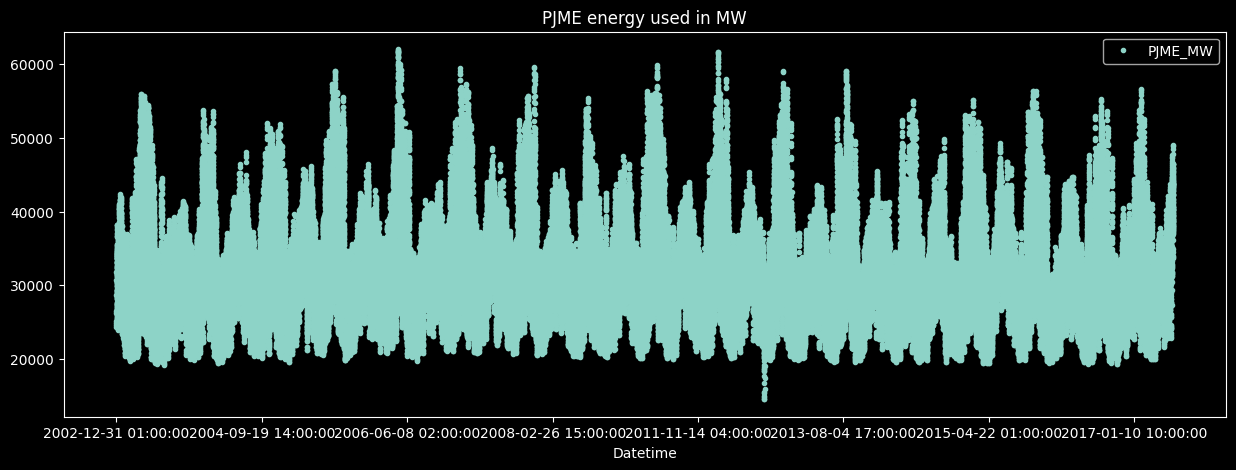

In [64]:
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title='PJME energy used in MW')

In [65]:
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [66]:
pd.to_datetime(df.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [67]:
df.index = pd.to_datetime(df.index)

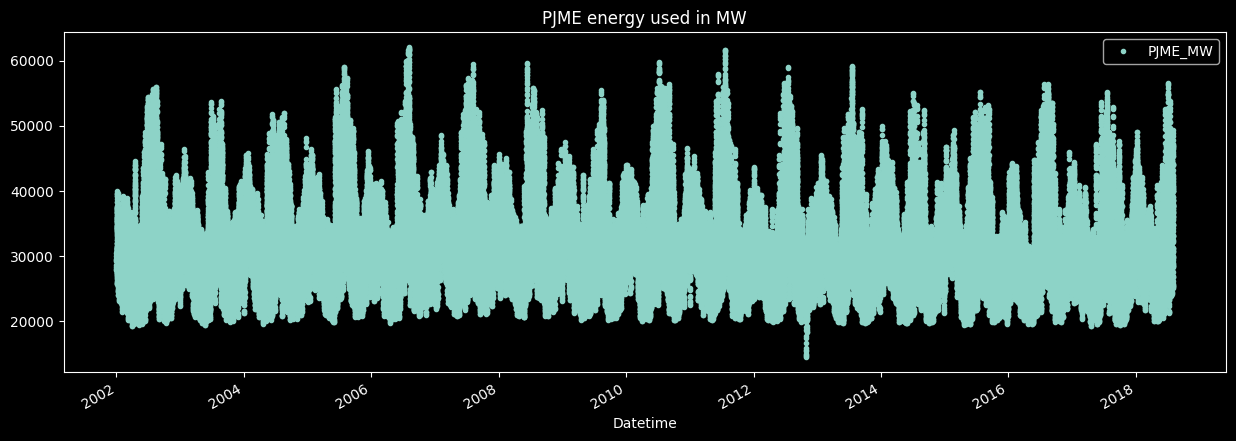

In [68]:
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title='PJME energy used in MW')
plt.savefig("figures/PJME_energy_used in MW.png", bbox_inches='tight', dpi=300)
plt.show()

# Train and test data

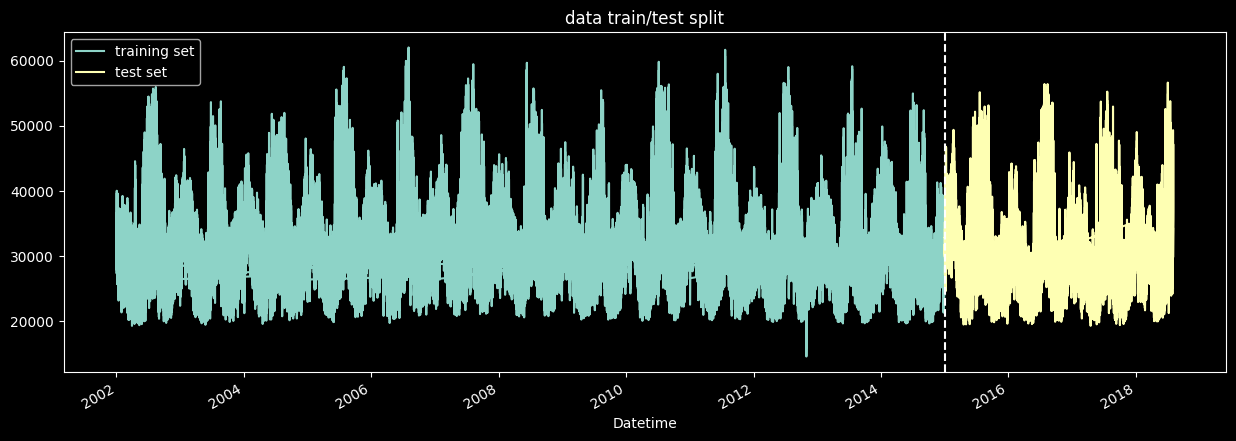

In [69]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='taining set', title='data train/test split')
test.plot(ax=ax, label='test set')
ax.axvline('01-01-2015', color='white', ls='--')
ax.legend(['training set', 'test set'])
plt.savefig("figures/energy_train_test_split.png", bbox_inches='tight', dpi=300)
plt.show()


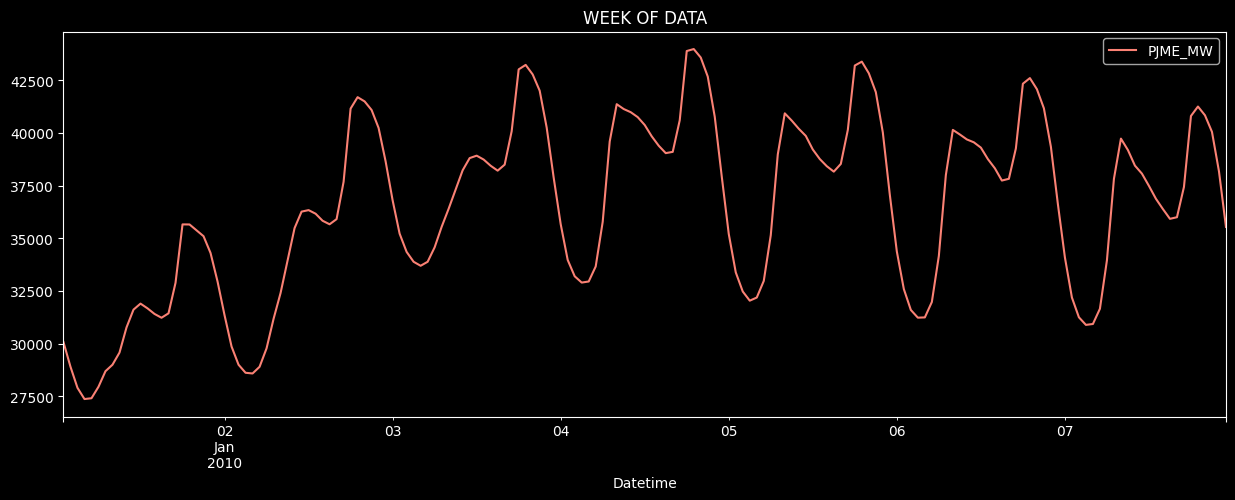

In [70]:
df = df.sort_index()
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5),
                                                                   color=color_pal[3],
                                                                   linewidth=1.5,
                                                                   title='WEEK OF DATA'                                                                   
                                                                  )

ax.grid(False)
plt.savefig("figures/week_of_data.png", bbox_inches='tight', dpi=300)
plt.show()


# Feature creation

In [71]:
def create_feature(df):
    """create time series feature based on time series index
    """
    df = df.copy()
    df = df.sort_index()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    return df

In [72]:
df = create_feature(df)

In [73]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,1,1
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,1,1
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,1,1
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,1,1
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,1,1


# Visualise feature/target relationship

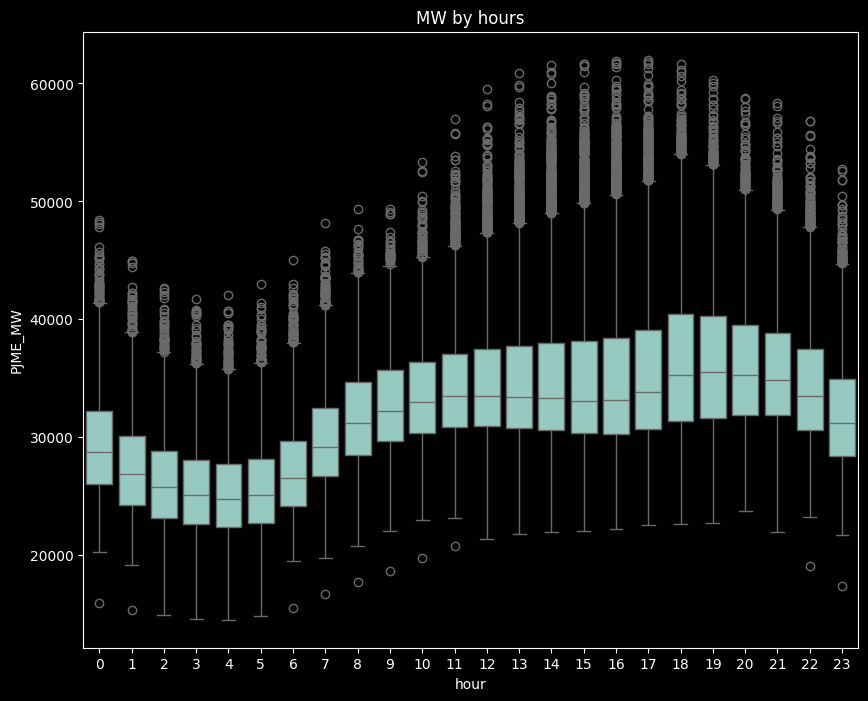

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by hours')
plt.savefig("figures/feature_target_relationship.png", bbox_inches='tight', dpi=300)
plt.show()

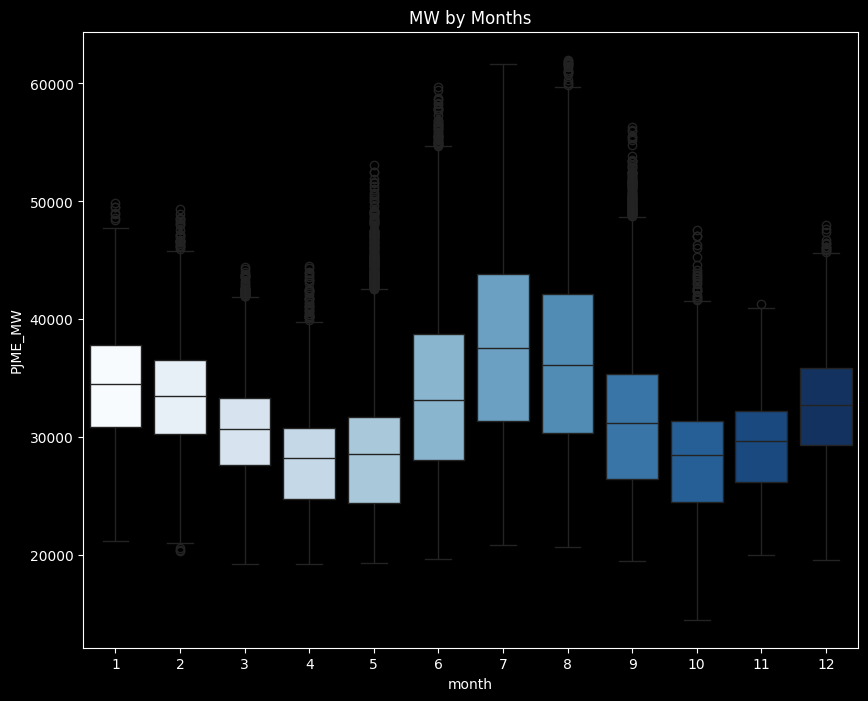

In [75]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month', y='PJME_MW',hue='month', legend=False, palette='Blues')
ax.set_title('MW by Months')
plt.show()

# Create the model

In [76]:
 train = create_feature(train)
 test = create_feature(test)

In [77]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [78]:
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

In [79]:
X_train = train[FEATURES]
y_train  = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [80]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators = 1000, early_stopping_rounds = 50,
                       objective='reg:squarederror', learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:32601.88296	validation_1-rmse:31654.29355
[100]	validation_0-rmse:12342.70382	validation_1-rmse:11523.37042
[200]	validation_0-rmse:5376.03485	validation_1-rmse:5171.66415
[300]	validation_0-rmse:3382.32421	validation_1-rmse:3832.39696
[400]	validation_0-rmse:2893.29804	validation_1-rmse:3713.79670
[446]	validation_0-rmse:2791.74048	validation_1-rmse:3729.66464


,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


# Feature importance

In [81]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns = ['importance']
                 )

In [82]:
fi.head()

,importance
dayofyear,0.113217
hour,0.452507
dayofweek,0.166094
quarter,0.024645
month,0.221312


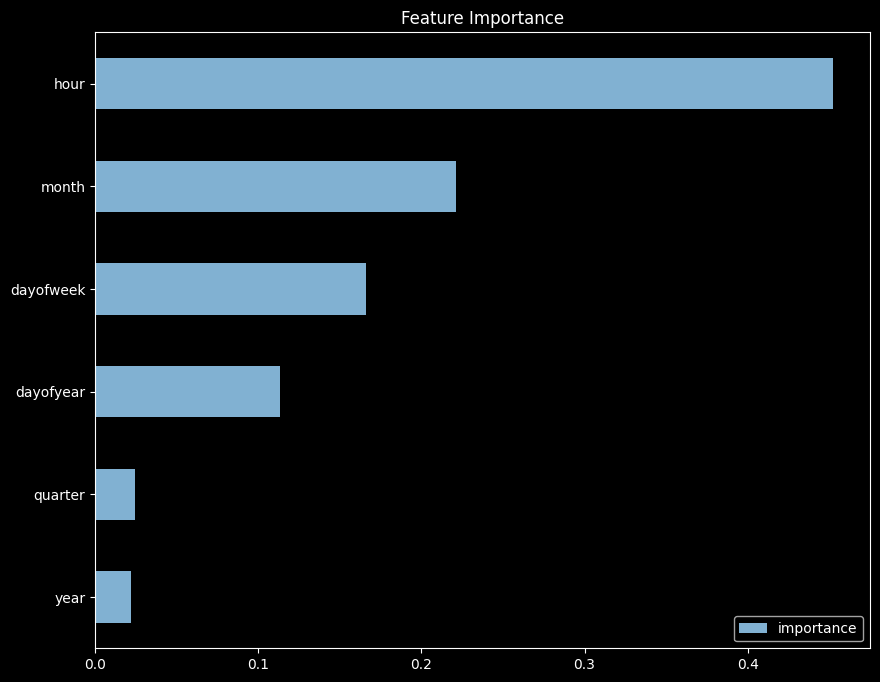

In [83]:
fi.sort_values('importance').plot(kind='barh',figsize=(10, 8), color=color_pal[4], title='Feature Importance')
plt.savefig("figures/feature_importance_ranking.png", bbox_inches='tight', dpi=300)
plt.show()

# Forecast on test

In [84]:
reg.predict(X_test)

array([31564.76 , 30455.756, 30065.133, ..., 39017.7  , 36044.453,
       31516.275], dtype=float32)

In [85]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

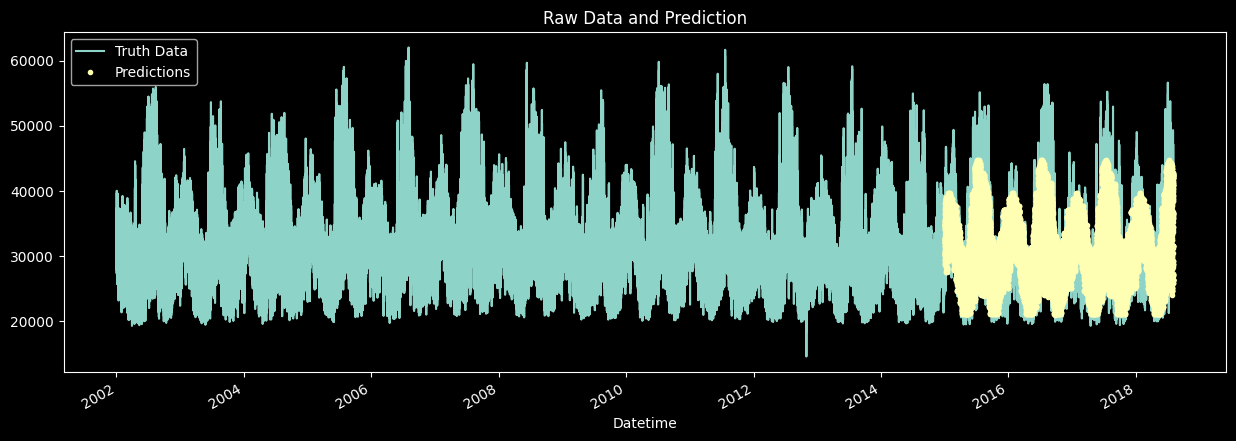

In [86]:
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.savefig("figures/forecast_results_comparison.png", bbox_inches='tight', dpi=300)
plt.show()

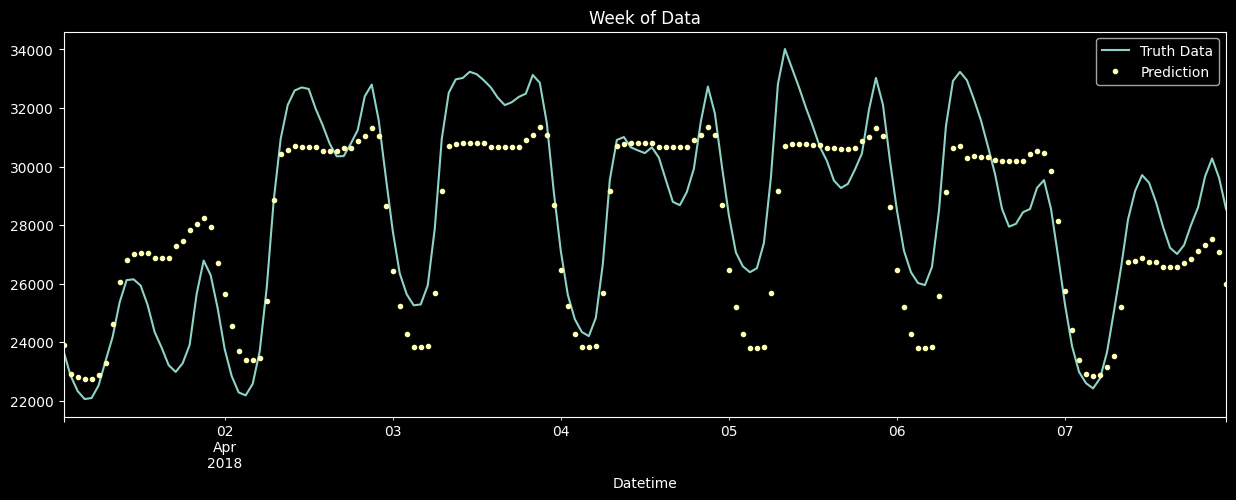

In [87]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15,5), title='Week of Data')

df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction']\
    .plot(style='.')

plt.legend(['Truth Data' , 'Prediction'])
plt.show()

# Score (RMSE)

In [88]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3713.70


# Calculate error
look at the worst and best days

In [89]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2016-08-13    14691.632975
2016-08-14    14459.365479
2016-09-10    11699.110921
2016-09-09    11511.434977
2016-08-12    11449.474772
2018-01-06    10887.203613
2015-02-20    10849.325928
2017-05-19    10204.390869
2015-02-16     9935.380534
2018-01-07     9933.848877
Name: error, dtype: float64

In [90]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2016-09-27    413.544189
2016-04-04    424.393229
2016-05-01    474.711507
2015-09-25    494.789876
2016-12-08    500.258138
2015-10-28    522.354818
2015-09-22    523.431396
2018-05-17    530.150065
2016-04-07    541.205811
2015-09-21    543.017171
Name: error, dtype: float64

# Mean absolute percentage error: MAPE

In [91]:
def calculate_mape(actual, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE)

    Parameters:
    - actual: array-like, true values
    - predicted: array-like, predicted values

    Returns:
    - mape: float, MAPE value
    """
    actual, predicted = np.array(actual), np.array(predicted)

    # Avoid division by zero
    mask = actual != 0
    actual, predicted = actual[mask], predicted[mask]

    # Calculate MAPE
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return mape


# Example usage
mape_score = calculate_mape(test['PJME_MW'], test['prediction'])
print(f'--- Final Model Performance ---')
print(f'RMSE Score: {score:0.2f} MW')
print(f'MAPE Score on Test set: {mape_score:0.2f}%')

--- Final Model Performance ---
RMSE Score: 3713.70 MW
MAPE Score on Test set: 8.56%
